## Диплом
### Козел А.Г. 
8.05.2023-21.05.2023

Набор данных https://www.kaggle.com/datasets/uciml/student-alcohol-consumption
Данные были получены при опросе учащихся курсов математики и португальского языка в общеобразовательной школе. Он содержит много интересной социальной, гендерной и учебной информации о студентах. 


Большинство работ, связанных с использованием этого набора данных направлены на предсказание итоговой успеваемости студентов. В качестве исследуемой переменной выберу употребление алкоголя студентами.

### Цель.
Выполнить анализ данных, полученных при опросе учащихся курсов математики и португальского языка в общеобразовательной школе. Выявить зависимости между социальной, гендерной, учебной информации о студентах и потреблением ими алкоголя. 


### Описание 
* school - школа ученика (двоичный код: «GP» — Габриэль Перейра или «MS» — Мусиньо да Силвейра)
* sex - пол студента (бинарный: "F" - женский или "M" - мужской)
* age - возраст студента (числовое: от 15 до 22)
* address -  тип домашнего адреса студента (двоичный: 'U' - городской или 'R' - сельский)
* famsize - размер семьи (двоичный: «LE3» — меньше или равно 3 или «GT3» — больше 3)
* Pstatus - статус совместного проживания родителей (двоичный: «T» — совместное проживание или «A» — отдельно)
* Medu -  образование матери (числовое: 0 - нет, 1 - начальное образование (4 класс), 2 - 5-9 класс, 3 - среднее или 4 - высшее)
* Fedu - образование отца (числовое: 0 - нет, 1 - начальное образование (4 класс), 2 - 5-9 класс, 3 - среднее или 4 - высшее)
* Mjob - работа матери (номинальное значение: «учитель», «медицина», «государственная служба» (например, административная или полицейская), «домашний» или «другой»)
* Fjob -  работа отца (номинальное: «учитель», «медицина», «государственная служба» (например, административная или полицейская), «домашний» или «другой»)
* reason - причина выбора этой школы (номинал: близко к "дому", "репутация школы", предпочтение "курса" или "другое")
* guardian - опекун студента (имя: «мать», «отец» или «другой»)
* traveltime - время в пути от дома до школы (числовое значение: 1 — <15 мин., 2 — от 15 до 30 мин., 3 — от 30 мин. до 1 часа или 4 — >1 часа)
* studytime - еженедельное время обучения (числовое значение: 1 — <2 часов, 2 — от 2 до 5 часов, 3 — от 5 до 10 часов или 4 — >10 часов)
* failures - количество прошлых сбоев класса (числовое: n, если 1<=n<3, иначе 4)
* schoolsup - дополнительная образовательная поддержка (двоичный код: да или нет)
* famsup - семейная образовательная поддержка (двоичный код: да или нет)
* paid - дополнительные платные занятия по предмету курса (математика или португальский язык) (двоичный код: да или нет)
* activities - внеклассные мероприятия (бинарные: да или нет)
* nursery - посещал детский сад (двоичный код: да или нет)
* higher - хочет получить высшее образование (бинарное: да или нет)
* internet - доступ в интернет дома (двоичный: да или нет)
* romantic - с романтическими отношениями (бинарный: да или нет)
* famrel - качество семейных отношений (числовое: от 1 - очень плохо до 5 - отлично)
* freetime - свободное время после школы (числовое: от 1 - очень мало до 5 - очень много)
* goout - встреча с друзьями (число: от 1 - очень низко до 5 - очень высоко)
* Dalc - потребление алкоголя в рабочие дни (числовое значение: от 1 - очень низкое до 5 - очень высокое)
* Walc - потребление алкоголя в выходные дни (числовое значение: от 1 - очень низкое до 5 - очень высокое)
* health - текущее состояние здоровья (числовое: от 1 - очень плохо до 5 - очень хорошо)
* absences -  количество пропусков занятий (числовое: от 0 до 93)


Эти оценки связаны с предметом курса, математикой или португальским языком:

* G1 - класс первого периода (числовые: от 0 до 20)
* G2 - второй класс (числовые: от 0 до 20)
* G3 - итоговая оценка (числовое значение: от 0 до 20, выходное значение)

In [1]:
# Загружаем требуемые библиотеки.
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import normaltest
from sklearn.model_selection import train_test_split
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_mat = pd.read_csv('student-mat.csv', sep=',')
df_por = pd.read_csv('student-por.csv', sep=',')
df = pd.concat([df_mat, df_por], ignore_index= True )

In [3]:
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [5]:
df.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      35
G1            18
G2            17
G3            19
dtype: int64

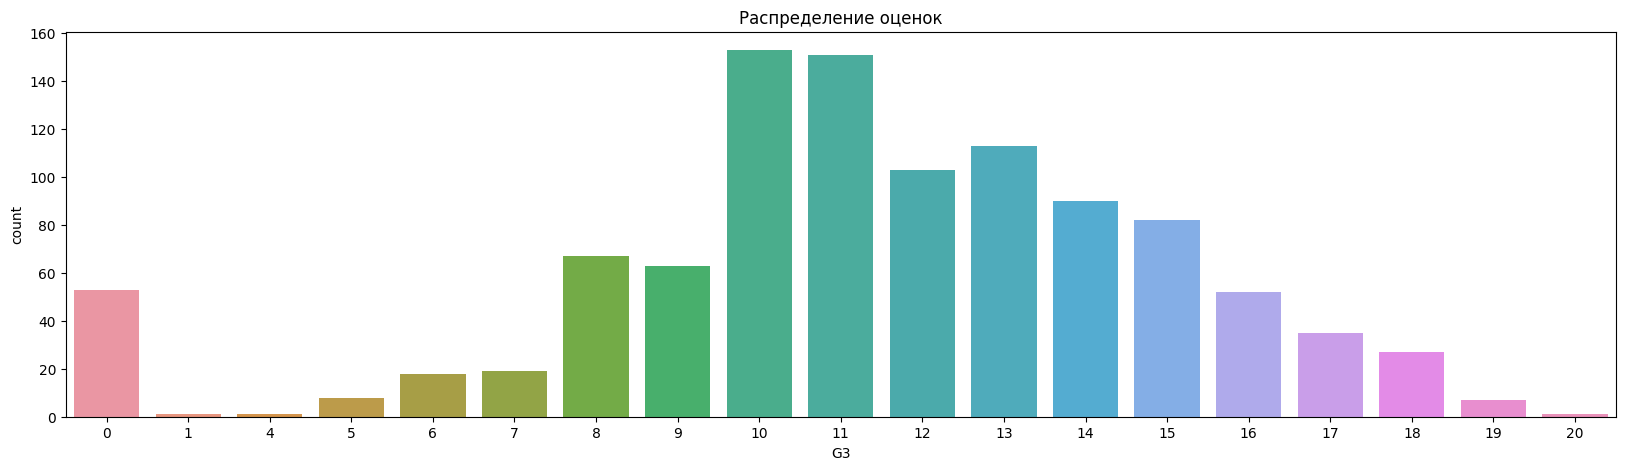

In [6]:
plt.figure(figsize=(20, 5))
sns.countplot(x = df['G3'])
ax = plt.gca()
plt.title('Распределение оценок')
plt.show()

Text(0.5, 1.0, 'correlation of feature')

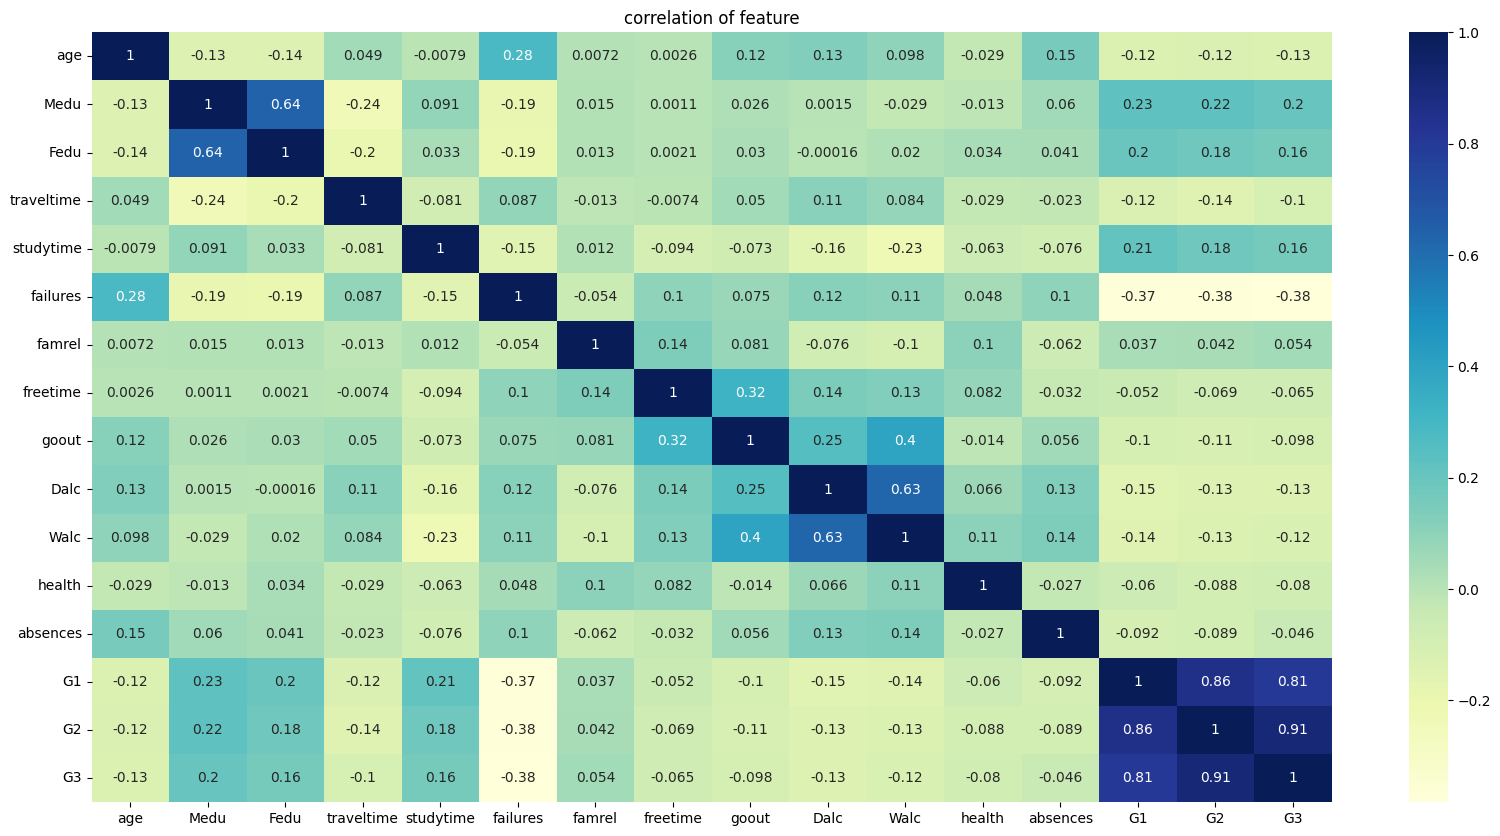

In [7]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot = True , cmap ="YlGnBu")
plt.title("correlation of feature")

In [8]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [9]:
df_copy = df.copy(deep=True)

In [10]:
df_copy['Alc'] = df_copy['Walc']+ df_copy['Dalc']
df_copy

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Alc
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,2
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,5
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,3
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,2
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,2
1042,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,7


In [11]:
#
df_copy['Alc'].value_counts()

2     391
3     182
4     159
5     118
6      85
7      49
8      26
10     24
9      10
Name: Alc, dtype: int64

In [12]:
df_copy['progress'] = df_copy['G3']-((df_copy['G1']+df_copy['G2'])/2)
df_copy

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,Alc,progress
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,2,0.5
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,2,1.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,5,2.5
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,2,0.5
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,2,1,2,5,4,10,11,10,3,-0.5
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,1,1,1,4,15,15,16,2,1.0
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,5,6,11,12,9,2,-2.5
1042,MS,M,17,U,LE3,T,3,1,services,services,...,5,3,4,2,6,10,10,10,7,0.0


In [13]:
#Убираем замененные колонки
df_copy = df_copy.drop(['G1', 'G2', 'Walc', 'Dalc'], axis=1)


Text(0.5, 1.0, 'Влияние школы на употребление алкоголя')

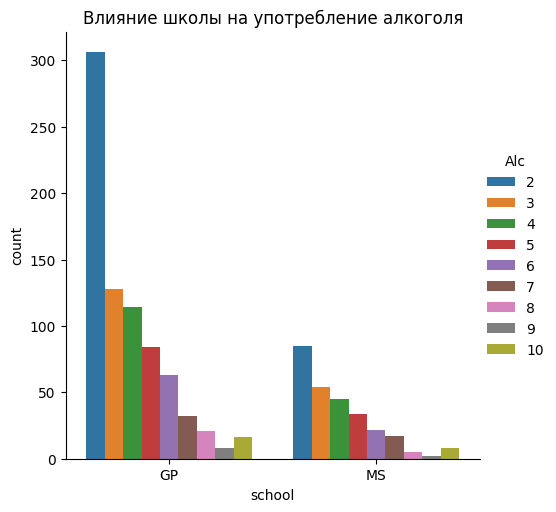

In [14]:
sns.catplot(data = df_copy,hue = 'Alc', x = 'school', kind='count')
plt.title('Влияние школы на употребление алкоголя')

Text(0.5, 1.0, 'Употребление алкоголя и причина выбора  школы')

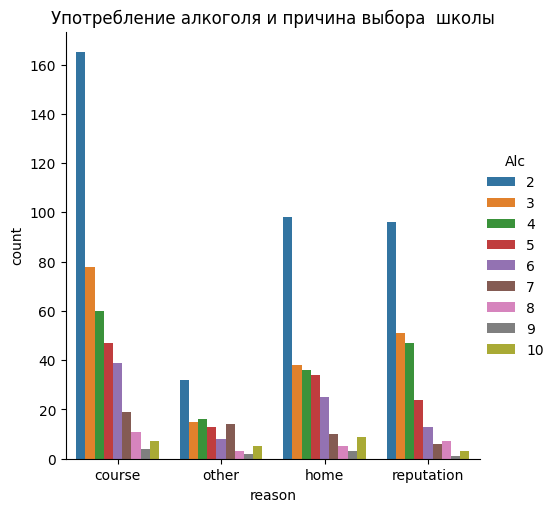

In [22]:
sns.catplot(data = df_copy,hue = 'Alc', x = 'reason', kind='count')
plt.title('Употребление алкоголя и причина выбора  школы')
# близко к "дому", "репутация школы", предпочтение "курса" или "другое"

Text(0.5, 1.0, 'Употребление алкоголя и время в пути от дома до школы ')

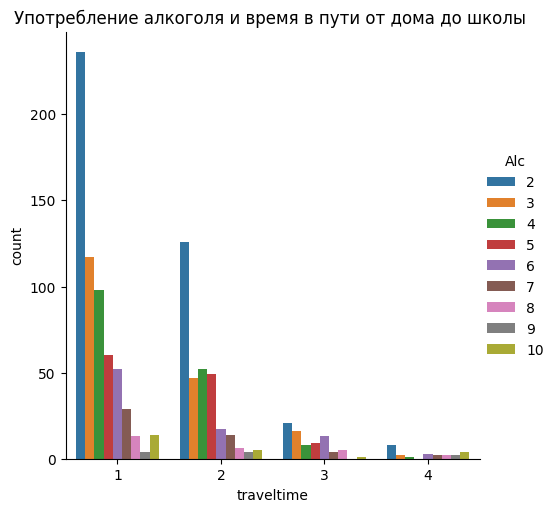

In [21]:
sns.catplot(data = df_copy,hue = 'Alc', x = 'traveltime', kind='count')
plt.title('Употребление алкоголя и время в пути от дома до школы ')
# (числовое значение: 1 — <15 мин., 2 — от 15 до 30 мин., 3 — от 30 мин. до 1 часа или 4 — >1 часа)

Text(0.5, 1.0, 'Связь посещения детского сада и употребления алкоголя')

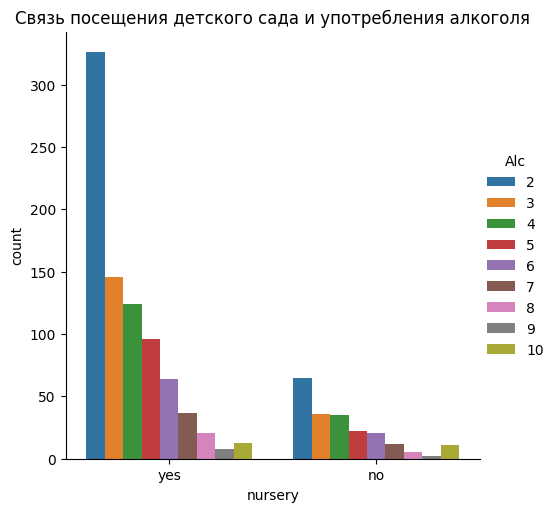

In [18]:
sns.catplot(data = df_copy,hue = 'Alc', x = 'nursery', kind='count')
plt.title('Связь посещения детского сада и употребления алкоголя')

Text(0.5, 1.0, 'Образование матери и употребление алкоголя')

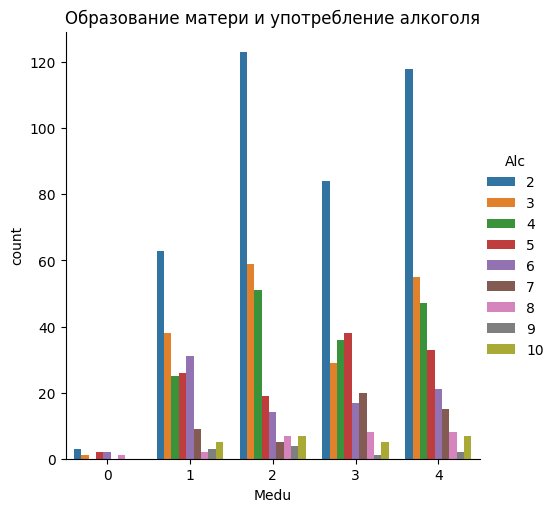

In [26]:
sns.catplot(data = df_copy,hue = 'Alc', x = 'Medu', kind='count')
plt.title('Образование матери и употребление алкоголя')

Text(0.5, 1.0, 'Работа матери и употребление алкоголя')

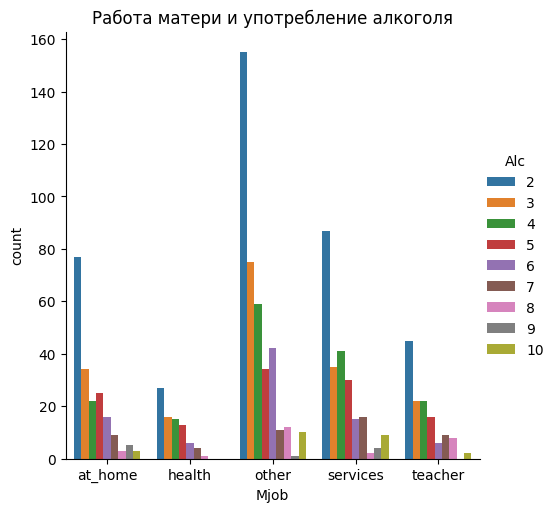

In [34]:
sns.catplot(data = df_copy,hue = 'Alc', x = 'Mjob', kind='count')
plt.title('Работа матери и употребление алкоголя')

Text(0.5, 1.0, 'Образование отца и употребление алкоголя')

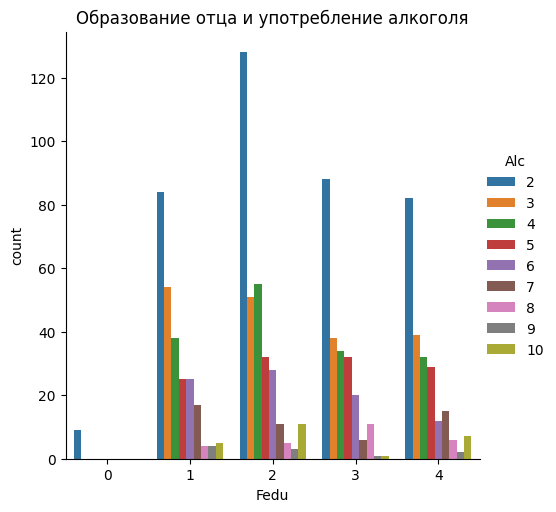

In [33]:
sns.catplot(data = df_copy,hue = 'Alc', x = 'Fedu', kind='count')
plt.title('Образование отца и употребление алкоголя')

Text(0.5, 1.0, 'Работа отца и употребление алкоголя')

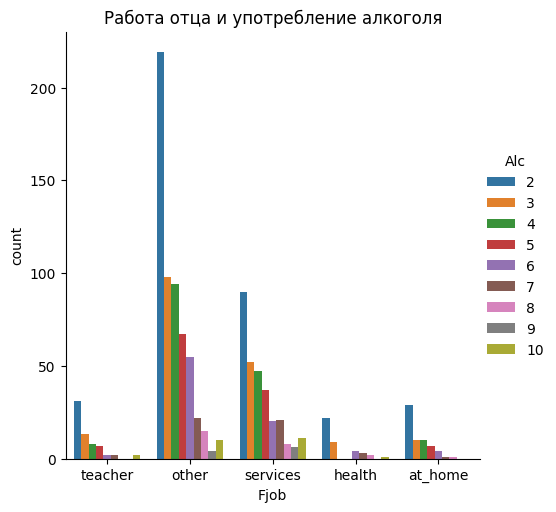

In [43]:
sns.catplot(data = df_copy,hue = 'Alc', x = 'Fjob', kind='count')
plt.title('Работа отца и употребление алкоголя')

Text(0.5, 1.0, 'опекун студента и употребление алкоголя')

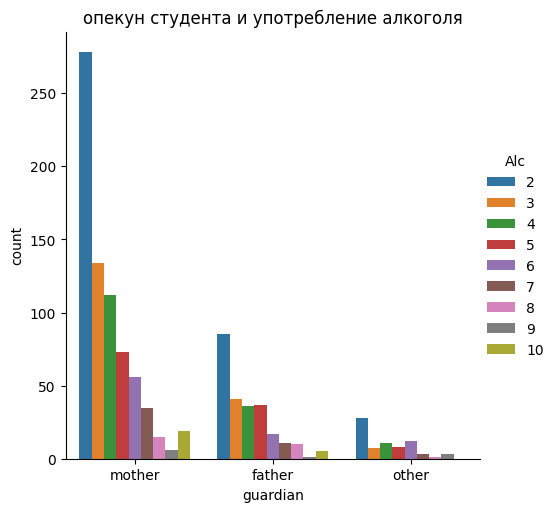

In [36]:
sns.catplot(data = df_copy,hue = 'Alc', x = 'guardian', kind='count')
plt.title('опекун студента и употребление алкоголя')

In [50]:
import plotly.express as px
def draw_sunburst(data_frame, path, color, save=False, filename= None):
    fig = px.sunburst(
    data_frame = data_frame,
    path = path,
    color = color,
    color_discrete_sequence = ["red","green","blue","orange"],
    maxdepth = -1,
    )
    fig.update_traces(textinfo='label+percent entry')
    fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))

    fig.show()

In [54]:
draw_sunburst(data_frame=df_copy, path=['sex', 'Alc'], color='sex', save=True, filename='sex')

In [57]:
draw_sunburst(data_frame=df_copy, path=['goout', 'Alc'], color='goout', save=True, filename='goout')
# встреча с друзьями (число: от 1 - очень низко до 5 - очень высоко)

Text(0.5, 1.0, 'Романтические отношения и употребление алкоголя')

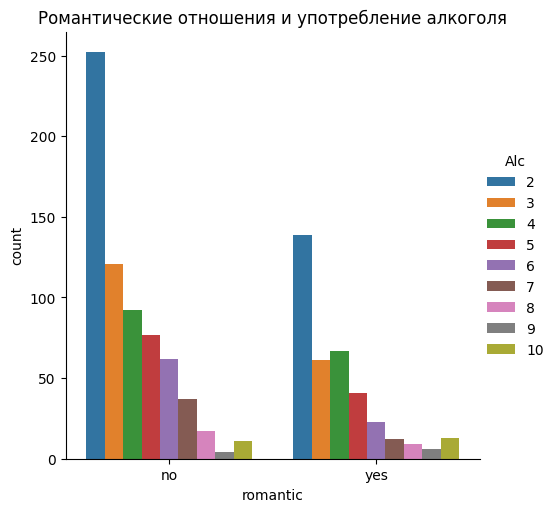

In [59]:
sns.catplot(data = df_copy,hue = 'Alc', x = 'romantic', kind='count')
plt.title('Романтические отношения и употребление алкоголя')

In [60]:
draw_sunburst(data_frame=df_copy, path=['higher', 'Alc'], color='higher', save=True, filename='higher')

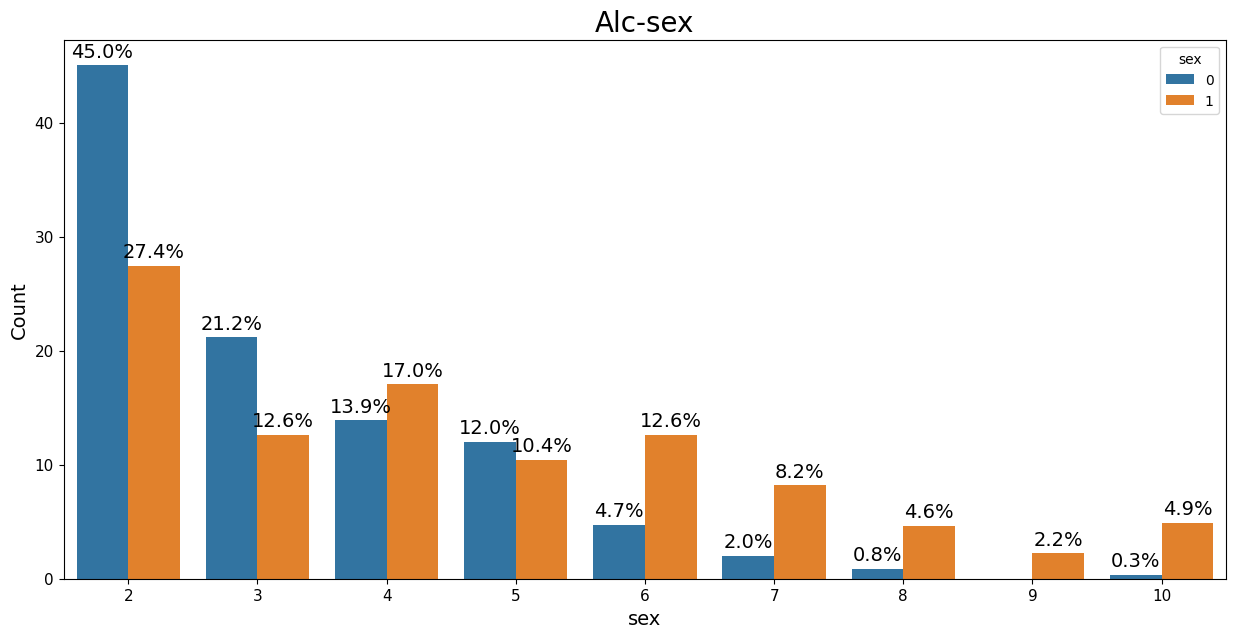

In [86]:
plt.figure(figsize=(15, 7))

educ_def = (df_copy.groupby(['sex'])['Alc']
            .value_counts(normalize=True)
            .rename('percentage')
            .mul(100)
            .reset_index()
            .sort_values('Alc'))

ax = sns.barplot(x="Alc", y="percentage", hue="sex", data=educ_def)

for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage,  # текст
                (p.get_x() + p.get_width() / 2., p.get_height()),  # координата xy
                ha='center',  # центрирование
                va='center',
                xytext=(0, 10),
                textcoords='offset points',  # точка смещения относительно координаты
                fontsize=14)

plt.title('Alc-sex', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('sex', fontsize=14)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11);

## Удалила признаки, которые не влияют существенно на употребление алкоголя

In [62]:
df_copy = df_copy.drop(['school', 'reason', 'traveltime', 'nursery'], axis=1)

In [63]:
df_copy.replace(to_replace = "yes", value = 1, inplace=True)
df_copy.replace(to_replace = "no", value = 0, inplace=True)
df_copy.replace(to_replace = "T", value = 1, inplace=True)
df_copy.replace(to_replace = "A", value = 0, inplace=True)
df_copy.replace(to_replace = "R", value = 1, inplace=True)
df_copy.replace(to_replace = "U", value = 0, inplace=True)
df_copy.replace(to_replace = "GT3", value = 1, inplace=True)
df_copy.replace(to_replace = "LE3", value = 0, inplace=True)
df_copy.replace(to_replace = "M", value = 1, inplace=True)
df_copy.replace(to_replace = "F", value = 0, inplace=True)

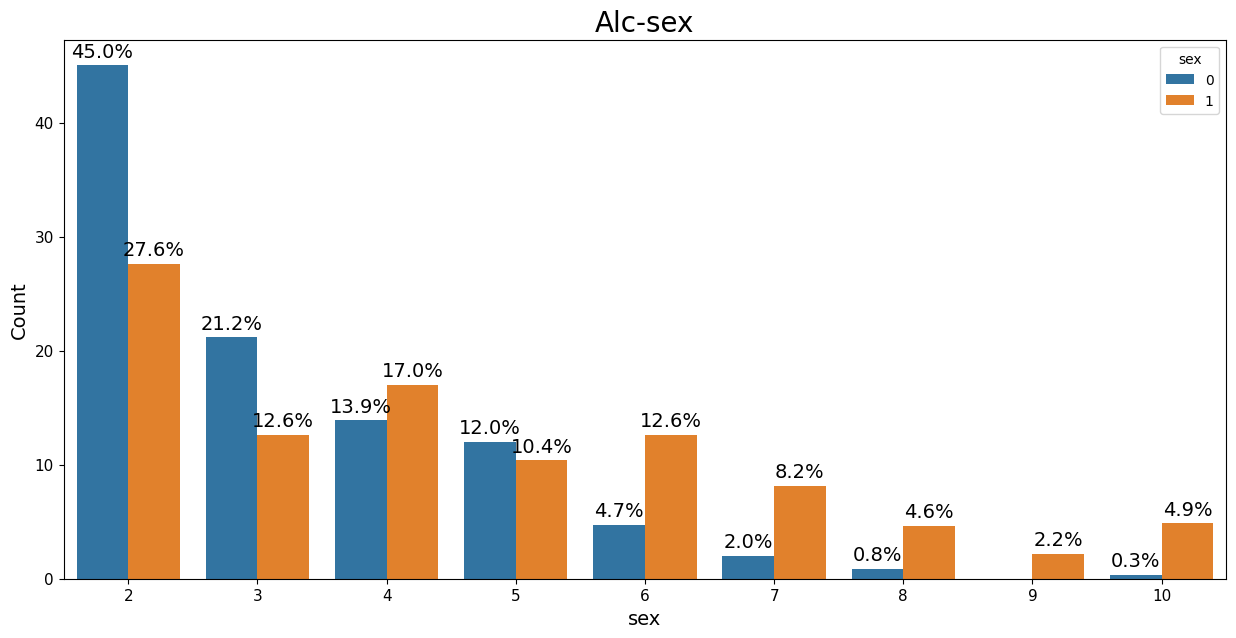

Text(0.5, 1.0, 'correlation of feature')

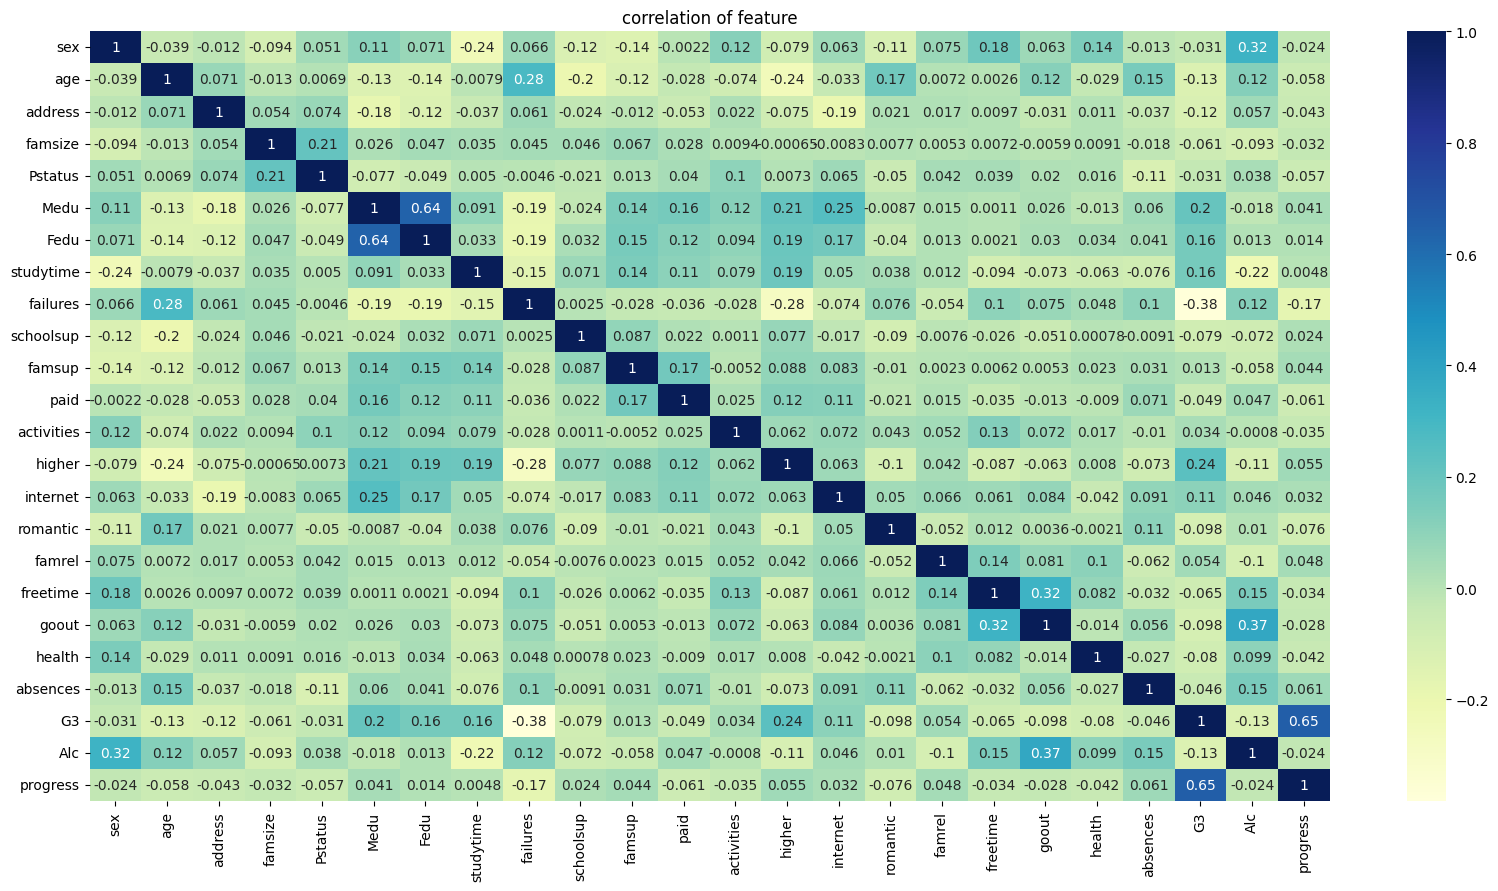

In [65]:
plt.figure(figsize = (20,10))
sns.heatmap(df_copy.corr(),annot = True , cmap ="YlGnBu")
plt.title("correlation of feature")

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [67]:
#Убираем  колонки
df_copy = df_copy.drop(['Mjob', 'Fjob', 'guardian'], axis=1)


In [68]:
df_copy

,sex,age,address,famsize,Pstatus,Medu,Fedu,studytime,failures,schoolsup,...,internet,romantic,famrel,freetime,goout,health,absences,G3,Alc,progress
0,0,18,0,1,0,4,4,2,0,1,...,0,0,4,3,4,3,6,6,2,0.5
1,0,17,0,1,1,1,1,2,0,0,...,1,0,5,3,3,3,4,6,2,1.0
2,0,15,0,0,1,1,1,2,3,1,...,1,0,4,3,2,3,10,10,5,2.5
3,0,15,0,1,1,4,2,3,0,0,...,1,1,3,2,2,5,2,15,2,0.5
4,0,16,0,1,1,3,3,2,0,0,...,0,0,4,3,2,5,4,10,3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,19,1,1,1,2,3,3,1,0,...,1,0,5,4,2,5,4,10,3,-0.5
1040,0,18,0,0,1,3,1,2,0,0,...,1,0,4,3,4,1,4,16,2,1.0
1041,0,18,0,1,1,1,1,2,0,0,...,0,0,1,1,1,5,6,9,2,-2.5
1042,1,17,0,0,1,3,1,1,0,0,...,1,0,2,4,5,2,6,10,7,0.0


In [69]:
df_duplicateRows = df_copy[df_copy.duplicated()]
df_duplicateRows.shape

(1, 24)

In [70]:
df_copy["is_duplicate"] = df_copy.duplicated(keep='first')
df_copy= df_copy[df_copy["is_duplicate"]==False]
df_copy = df_copy.drop(["is_duplicate"], axis=1)
df_copy.shape

(1043, 24)

In [71]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043 entries, 0 to 1043
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         1043 non-null   int64  
 1   age         1043 non-null   int64  
 2   address     1043 non-null   int64  
 3   famsize     1043 non-null   int64  
 4   Pstatus     1043 non-null   int64  
 5   Medu        1043 non-null   int64  
 6   Fedu        1043 non-null   int64  
 7   studytime   1043 non-null   int64  
 8   failures    1043 non-null   int64  
 9   schoolsup   1043 non-null   int64  
 10  famsup      1043 non-null   int64  
 11  paid        1043 non-null   int64  
 12  activities  1043 non-null   int64  
 13  higher      1043 non-null   int64  
 14  internet    1043 non-null   int64  
 15  romantic    1043 non-null   int64  
 16  famrel      1043 non-null   int64  
 17  freetime    1043 non-null   int64  
 18  goout       1043 non-null   int64  
 19  health      1043 non-null  

In [72]:
y = df_copy['Alc']
X = df_copy.drop(['Alc'], axis=1)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=42)

In [74]:
rfc = RandomForestClassifier(max_depth=100) 
rfc.fit(X_train,y_train)
rfc.score (X_test, y_test)

0.6230031948881789

In [76]:
RFC = RandomForestClassifier()
parametrs = {'max_depth': range (5, 50, 2),
           'max_features': (range(1, 5, 1))}

grid = GridSearchCV(RFC, parametrs).fit(X_train, y_train)

grid.best_params_

{'max_depth': 27, 'max_features': 2}

In [77]:
dd1 = RandomForestClassifier(max_depth=19, max_features=2)
dd1.fit(X_train, y_train)
dd1.score(X_test, y_test)

0.6325878594249201

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dd = DecisionTreeClassifier(max_depth=40)
dd.fit(X_train, y_train)
dd.score(X_test, y_test)

0.5654952076677316

In [80]:
DTC = DecisionTreeClassifier()
parametrs = {'max_depth': range (5, 50, 2),
           'max_features': (range(1, 5, 1))}

grid = GridSearchCV(DTC, parametrs).fit(X_train, y_train)

grid.best_params_

{'max_depth': 27, 'max_features': 1}

In [81]:
dd = DecisionTreeClassifier(max_depth=41, max_features= 3)
dd.fit(X_train, y_train)
dd.score(X_test, y_test)

0.3993610223642173

In [82]:
dd.score (X_train, y_train)

1.0

In [83]:
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB()

In [84]:
model.fit(X_train, y_train) #  Обучаем модель на данных
y_model = model.predict(X_test)  # Предсказываем значения для новых данных
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)

0.12140575079872204

In [85]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from hyperopt import fmin, tpe, hp

# Обучаем модель
model = RandomForestClassifier(random_state=7)
model.fit(X_train, y_train)

# Функция потерь для оптимизации
def loss(params):
    params = np.array(params).reshape(1, -1)
    prediction = model.predict_proba(params)
    return -prediction[0][1]

# Задаем пространство поиска
space = [hp.uniform(f'x{i}', 0, 1) for i in range(X.shape[1])]

# Используем Hyperopt для оптимизации
best_params = fmin(fn=loss, space=space, algo=tpe.suggest, max_evals=1000)

# Печатаем результаты
print('Оптимальные параметры: ', [best_params[f'x{i}'] for i in range(X.shape[1])])
print('Максимальное предсказание: ', -loss([best_params[f'x{i}'] for i in range(X.shape[1])]))

100%|██████████| 1000/1000 [01:31<00:00, 10.98trial/s, best loss: -0.49]
Оптимальные параметры:  [0.4353849415808311, 0.1360169040195114, 0.5986774445422015, 0.7917660122738845, 0.6928856601654751, 0.7559470870263336, 0.9602063866483523, 0.7801963653879224, 0.9786012200720621, 0.1896240580762928, 0.6097219109553675, 0.30308756988459873, 0.05143891482213009, 0.5297644293399849, 0.5443372271804425, 0.5218513093501007, 0.3723907881213534, 0.2751499999940479, 0.52864415958485, 0.8124748980930503, 0.301987155471974, 0.9385615129537594, 0.08783706645192604]
Максимальное предсказание:  0.49
